# Project: Wrangling and Analyze Data

####  Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. <br>
####  After data wrangling, I will showcase them through analyses and visualizations using Python.
<br>
Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

# Data Gathering
<br>

### The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.<br> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage.

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


#### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
<br>
This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017

In [72]:
import pandas as pd
df1 =  pd.read_csv('twitter-archive-enhanced.csv',sep = ',')
df1.head(4)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


#### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

Running every image in the WeRateDogs Twitter archive through a [neural network ](https://www.youtube.com/watch?v=2-Ol7ZB0MmU)that can classify breeds of dogs. <br>
The results is a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction.

In [73]:
import requests
import os

folder_name = 'tsv_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

#read the data
df2 =  pd.read_csv('tsv_folder/image-predictions.tsv',sep = '\t')
df2.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In this project, I'll be using Tweepy to query Twitter's API for data included in the WeRateDogs Twitter archive. 
This data will include retweet count and favorite count.<br><br> 
Before I can run my API querying code, I need to set up my own Twitter application. Once I have this set up, I will develop some code to create an API object that I'll use to gather Twitter data. <br><br>
After querying each tweet ID, I will write its JSON data to a tweet_json.txt file with each tweet's JSON data on its own line. 
<br><br>
I will then read this file, line by line, to create a pandas DataFrame that I will assess and clean.

#### create an API object that I can use to gather Twitter data.

In [74]:
import tweepy
from tweepy import OAuthHandler
import json
import datetime as dt
import time
import os
import sys
import json
from timeit import default_timer as timer
import re
import pandas as pd

 we extract tweets with the help of tweet_id. We get the tweet_id from the image predictions file.

Running the below code authenticates your application and you can then interact with the Twitter API to extract data:
<br>
the API allows us to enter a tweet archive which contains the info of all the tweets on Twitter. We are only interested in the tweets for the WeRateDogs page which all have specific id's that are listed in a column of the predictions DataFrame. 

In [75]:
def load_api():
    ''' Function that loads the twitter API after authorizing
        the user. '''
    #Think of the API key as the user name that represents your App when making API requests. It helps us verify who you are.
    consumer_key = 'JyBryBqb9IJrgukd5Ds7fnZMM' #API Key
    
    #Key Secret is like a password and helps verify your API Key. should save it in a safe place
    consumer_secret = 'aTLPYQBkAY0WFfNSxCdcDzU8wElurmtXgQTFDrYeNGrlJquVnY' #API Key Secret
    
    access_token = '1499648816475095045-SjnmjKFH0BkiGqV6u3F60vWWEsQVjC' #Access Token
    access_secret = 'TtRTL38lr0Y26MpyWVygB2GXW9UUIgLhfjuIMxCTUrInR' #Access Token Secret
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    # load the twitter API via tweepy
    
    #Due to Twitter's Rate Limit, which is used to control the rate of traffic sent or received by a server, 
    #Printing out each tweet ID after it was queried and using a code timer were both helpful for sanity reasons
    
    #Rate limits are divided into 15 minute intervals
    #To query all of the tweet IDs in the WeRateDogs Twitter archive, 20-30 minutes of running time can be expected. 
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    return api
api = load_api()

print other users timeline from their main page

In [76]:
# public_tweets = api.user_timeline('LeoDiCaprio')  
  
# for tweet in public_tweets:  
#     print (tweet.text)
    


# tweet = api.get_status(666020888022790149)

# tweet.text



# public_tweets = api.home_timeline()
# for tweet in public_tweets:
#     #print(tweet.text)
#     pass

# tweet2 = api.get_status(892420643555336193, tweet_mode='extended')
# tweet2; # more details

Due to Twitter's Rate Limit, which is used to control the rate of traffic sent or received by a server, <br>
Printing out each tweet ID after it was queried and using a code timer were both helpful for sanity reasons<br>
Rate limits are divided into 15 minute interval<br>
To query all of the tweet IDs in the WeRateDogs Twitter archive, 20-30 minutes of running time can be expected. <br>

In [77]:
# tweet_ids = df2.tweet_id.values
# len(tweet_ids)
# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
# end = timer()
# print(end - start)
# print(fails_dict)

#### Twitter limits the maximum number of tweets returned per search to 100. 
#### We use a function  called tweet_search() that searches for up to max_tweets=100 tweets

read the tweet_json.txt file into a pandas df

In [78]:
# df_list = []
# with open('tweet-json-final.txt', encoding='utf-8') as file:
#         tweet_id = file.readline()[:-1]
#         retweet_count = file.readline()[:-1]
#         facorite_count = file.readline()[:-1]
#         df_list.append({'tweet_ID': tweet_id,
#                         'retweet_count': retweet_count,
#                         'facorite_count': facorite_count})
# df = pd.DataFrame(df_list, columns = ['tweet_ID', 'retweet_count', 'facorite_count'])
# df

In [79]:
# create a list for converting to pd.datafram
tweetlist =[]
with open('tweet-json-final.txt',encoding = 'utf-8') as file:
    # use for loop to convert txt file line by line to json object
    for line in file.readlines():
        data = json.loads(line)
        tweet_id = data['id_str']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
        followers_count = data['user']['followers_count']
        friends_count = data['user']['friends_count']
        listed_count = data['user']['listed_count']
        favourites_count = data['user']['favourites_count']
        # create dictionary and append it to list
        tweetdic = {'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                   'favorite_count': favorite_count,
                   'followers_count': followers_count,
                   'friends_count': friends_count,
                   'listed_count': listed_count,
                   'favourites_count': favourites_count}
        tweetlist.append(tweetdic)
# convert list to DataFram
json_df = pd.DataFrame(tweetlist)


In [80]:
json_df.sample(10)

,favorite_count,favourites_count,followers_count,friends_count,listed_count,retweet_count,tweet_id
88,26022,114031,3200891,104,2786,4922,875021211251597312
2174,1074,114031,3201012,104,2812,522,669203728096960512
1292,3385,114031,3200947,104,2803,1273,707995814724026368
149,8945,114031,3200891,104,2786,2687,863062471531167744
1724,18278,114031,3200953,104,2805,8067,680055455951884288
1100,9629,114031,3200944,104,2803,4707,735274964362878976
1375,2299,114031,3200950,104,2803,523,701601587219795968
550,6886,114031,3200897,104,2788,2355,804475857670639616
1660,26239,114031,3200952,104,2805,15043,682962037429899265
609,22328,114031,3200900,104,2788,7726,797236660651966464


In [81]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
favorite_count      2354 non-null int64
favourites_count    2354 non-null int64
followers_count     2354 non-null int64
friends_count       2354 non-null int64
listed_count        2354 non-null int64
retweet_count       2354 non-null int64
tweet_id            2354 non-null object
dtypes: int64(6), object(1)
memory usage: 128.8+ KB


- the four token/key 
- You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal

## Assessing Data
In this section, detect and document **quality issues and tidiness issue** using **both** visual assessment
programmatic assessement to assess the data.



# Programmatic assessment


#### *twitter_archive table*



In [82]:
df1.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2242,667911425562669056,nan,nan,2015-11-21 03:44:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Wow. Armored dog here. Ready for battle. Face ...,nan,nan,NaN,https://twitter.com/dog_rates/status/667911425...,5,10,None,None,None,None,None
26,886983233522544640,nan,nan,2017-07-17 16:17:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,nan,nan,NaN,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,None,None,None,None
1617,685169283572338688,nan,nan,2016-01-07 18:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerbald. He just found out he's adopted. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/685169283...,11,10,Gerbald,None,None,pupper,None
217,850380195714523136,nan,nan,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None
470,816816676327063552,nan,nan,2017-01-05 01:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timber. He misses Christmas. Specifica...,nan,nan,NaN,https://twitter.com/dog_rates/status/816816676...,12,10,Timber,None,None,None,None
1472,693942351086120961,nan,nan,2016-01-31 23:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kobe. He's a Speckled Rorschach. Reque...,nan,nan,NaN,https://twitter.com/dog_rates/status/693942351...,10,10,Kobe,None,None,None,None


- 59 null items in expanded_urls columns when it should have scripts

In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<br>
<br>

- ID fields: The ID fields, like tweet_id, should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.


- Same for the reply status id and reply user id fields

In [84]:
df1['in_reply_to_user_id']

0      nan
1      nan
2      nan
3      nan
4      nan
5      nan
6      nan
7      nan
8      nan
9      nan
10     nan
11     nan
12     nan
13     nan
14     nan
15     nan
16     nan
17     nan
18     nan
19     nan
20     nan
21     nan
22     nan
23     nan
24     nan
25     nan
26     nan
27     nan
28     nan
29     nan
        ..
2326   nan
2327   nan
2328   nan
2329   nan
2330   nan
2331   nan
2332   nan
2333   nan
2334   nan
2335   nan
2336   nan
2337   nan
2338   nan
2339   nan
2340   nan
2341   nan
2342   nan
2343   nan
2344   nan
2345   nan
2346   nan
2347   nan
2348   nan
2349   nan
2350   nan
2351   nan
2352   nan
2353   nan
2354   nan
2355   nan
Name: in_reply_to_user_id, Length: 2356, dtype: float64

In [85]:
df1['in_reply_to_user_id'].value_counts()

4196983835.00            47
21955058.00               2
730505014150582272.00     1
29166305.00               1
3105440746.00             1
291859009.00              1
279280991.00              1
2319108198.00             1
180670967.00              1
30582082.00               1
26259576.00               1
194351775.00              1
358972768.00              1
840547864354918400.00     1
2894131180.00             1
21435658.00               1
2281181600.00             1
16487760.00               1
4717297476.00             1
28785486.00               1
1582853809.00             1
467036706.00              1
47384430.00               1
13615722.00               1
15846407.00               1
20683724.00               1
16374678.00               1
11856342.00               1
1198988510.00             1
113211856.00              1
77596200.00               1
Name: in_reply_to_user_id, dtype: int64

In [86]:
# not in Scientific notation form
pd.set_option('display.float_format',lambda x : '%.2f' % x)
df1.loc[30] # index line 30 


tweet_id                                                     886267009285017600
in_reply_to_status_id                                     886266357075128320.00
in_reply_to_user_id                                               2281181600.00
timestamp                                             2017-07-15 16:51:35 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @NonWhiteHat @MayhewMayhem omg hello tanner yo...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

<br><br>
- Rating denominator is not always 10 (for 666287406224695296, it's 2)
<br>
<br>

In [87]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

These ratings almost always have a denominator of 10. The numerators almost always greater than 10. 11/10, 12/10, 13/10, etc.  Because "they're good dogs Brent."
<br>
<br>
- Rating numerator is sometime extremely large (for 684225744407494656, it's 143)
<br>
<br>


In [88]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [89]:
df1_420 = df1.loc[df1['rating_numerator'] == 420]
df1_420

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,855861584463351808.00,194351775.00,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,nan,nan,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,nan,nan,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,nan,nan,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


<br>
<br>

- Some dogs don't have names listed ('None') or are words from text instead of actual names ('quite','a','an','the')
<br>
<br>

In [90]:
df1['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Buddy          7
Bailey         7
Daisy          7
an             7
Dave           6
Jack           6
Stanley        6
Leo            6
Bella          6
Rusty          6
Oscar          6
Koda           6
Scout          6
Jax            6
Milo           6
Finn           5
            ... 
Kingsley       1
Steve          1
Barney         1
Zeek           1
Hero           1
Lulu           1
Puff           1
Grady          1
Saydee         1
Dallas         1
Jockson        1
Taz            1
Ito            1
Link           1
Staniel        1
Shawwn         1
Odin           1
Aiden          1
Tilly          1
Ginger         1
Sully          1
Halo           1
Ralphus        1
Ralphie        1
Daniel         1
Genevieve      1
Tyrus          1
Oddie         

<br>
<br>
- There are some tweets with images that are not of dogs
<br>
<br>


In [91]:
df2.sample(6)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1287,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.93,True,Chesapeake_Bay_retriever,0.04,True,golden_retriever,0.01,True
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,1.00,True,Cardigan,0.00,True,English_springer,0.00,True
329,672082170312290304,https://pbs.twimg.com/media/CVO3KodXAAAj1de.jpg,1,hamster,0.13,False,toy_poodle,0.12,True,bubble,0.06,False
1865,843235543001513987,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1,Pembroke,0.96,True,Cardigan,0.02,True,Chihuahua,0.01,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.37,True,Chesapeake_Bay_retriever,0.14,True,malamute,0.07,True
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.93,True,Cardigan,0.04,True,Chihuahua,0.01,True


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [93]:
df2_not_dogs = df2.loc[(df2['p1_dog'] == False) &(df2['p2_dog'] == False)  &( df2['p3_dog'] == False)]
df2_not_dogs

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.93,False,mud_turtle,0.05,False,terrapin,0.02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.97,False,cock,0.03,False,partridge,0.00,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.09,False,desk,0.09,False,bookcase,0.08,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.91,False,otter,0.02,False,great_grey_owl,0.01,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,1.00,False,skunk,0.00,False,hamster,0.00,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.40,False,barracouta,0.27,False,gar,0.19,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,1.00,False,slug,0.00,False,acorn,0.00,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.44,False,armadillo,0.11,False,common_iguana,0.04,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.59,False,chain_saw,0.19,False,wig,0.03,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.99,False,African_hunting_dog,0.01,False,coyote,0.00,False


<br>
<br>

- timestamp is a string when it should be a datetime type
<br><br>

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [95]:
df1['timestamp'].dtypes

dtype('O')

 # Visual assessment

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [97]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
favorite_count      2354 non-null int64
favourites_count    2354 non-null int64
followers_count     2354 non-null int64
friends_count       2354 non-null int64
listed_count        2354 non-null int64
retweet_count       2354 non-null int64
tweet_id            2354 non-null object
dtypes: int64(6), object(1)
memory usage: 128.8+ KB


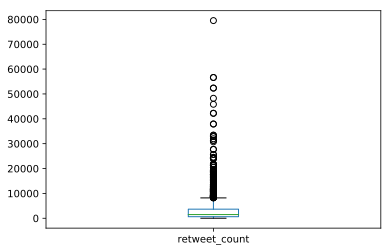

In [98]:
json_df['retweet_count'].plot(kind = 'box')

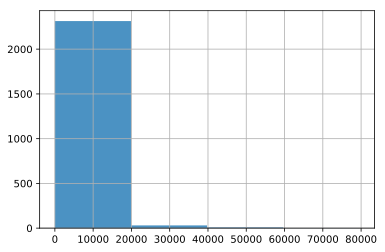

In [99]:
json_df['retweet_count'].hist(alpha=0.8, bins=4, label='retweet_count')

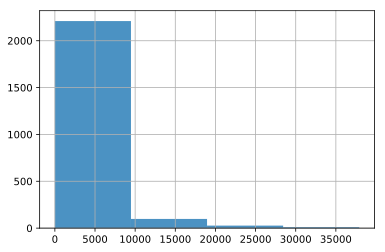

In [100]:
json_df_no_outlier = json_df.loc[json_df['retweet_count'] < 40000]
json_df_no_outlier['retweet_count'].hist(alpha=0.8, bins=4, label='retweet_count')

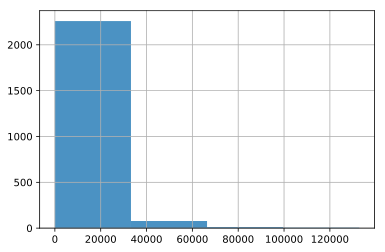

In [101]:
json_df['favorite_count'].hist(alpha=0.8, bins=4, label='favorite_count')

### Quality issues
1. 59 null items in expanded_urls columns when it should have scripts

2. All the ID fields, like tweet_id, should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations. (the column type should be consistency, which is crucial for the data merging )

3. Rating denominator is not always 10 (for 666287406224695296, it's 2)

4. Rating numerator is sometime extremely large

5. Some dogs don't have names listed  or are words from text instead of actual names ('quite','a','an','the')

6.  timestamp is a string when it should be a datetime type

7. df2 : There are some tweets with images that are not of dogs


### Tidiness issues
1.

2.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [102]:
# Make copies of original pieces of data
df1_clean = df1.copy(deep=True)
df2_clean = df2.copy(deep=True)
json_df_clean= json_df.copy(deep=True)

### Issue #1:

#### Define: 59 null items in expanded_urls columns when it should have scripts

#### Code solution: replace the null value with empty string.

In [103]:

df1_clean['expanded_urls']=df1_clean['expanded_urls'].fillna(0)
# data=data.replace(['\n',' '],'')
            

In [104]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# 2

when using the column as key/index to do the merging, it is important to transfer the form into str but not object.

In [105]:
# for df1 change the column type
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)
df1_clean['in_reply_to_status_id'] = df1_clean['tweet_id'].astype(object)
df1_clean['in_reply_to_user_id'] = df1_clean['tweet_id'].astype(object)
df1_clean['retweeted_status_id'] = df1_clean['retweeted_status_id'].astype(object)
df1_clean['retweeted_status_user_id'] = df1_clean['retweeted_status_user_id'].astype(object)
# same for df2
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)

df1_clean.head(2)
df2_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True


# 5

In [106]:
df1_clean['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Buddy          7
Bailey         7
Daisy          7
an             7
Dave           6
Jack           6
Stanley        6
Leo            6
Bella          6
Rusty          6
Oscar          6
Koda           6
Scout          6
Jax            6
Milo           6
Finn           5
            ... 
Kingsley       1
Steve          1
Barney         1
Zeek           1
Hero           1
Lulu           1
Puff           1
Grady          1
Saydee         1
Dallas         1
Jockson        1
Taz            1
Ito            1
Link           1
Staniel        1
Shawwn         1
Odin           1
Aiden          1
Tilly          1
Ginger         1
Sully          1
Halo           1
Ralphus        1
Ralphie        1
Daniel         1
Genevieve      1
Tyrus          1
Oddie         

In [107]:
name_list = df1_clean['name'].unique()
name_list.sort()
name_list

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [108]:
not_name_list = name_list[-25:]
df1_clean=df1_clean.replace(not_name_list,  'None')

# 6

change string into datetime64[ns]

In [109]:
df1['timestamp'] = df1['timestamp'].map(lambda x: pd.to_datetime(x))

# 7

In [110]:
not_dogs_condition = (df2_clean['p1_dog'] == False) &(df2_clean['p2_dog'] == False)  &( df2_clean['p3_dog'] == False)
df2_not_dogs = df2_clean.loc[not_dogs_condition] 
df2_not_dogs.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.93,False,mud_turtle,0.05,False,terrapin,0.02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.97,False,cock,0.03,False,partridge,0.00,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.09,False,desk,0.09,False,bookcase,0.08,False


In [111]:
df2_clean = df2_clean.drop(df2_clean[not_dogs_condition].index)
df2_not_dogs = df2_clean.loc[not_dogs_condition] 
df2_not_dogs

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# final step in cleaning: merge the data

# step 1

In [112]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2),

In [113]:
pd.set_option('display.max_columns',None)

### if I choose the inner join way, only pick the data in both table, I check the line. <br>About $ (2350-1750) \over 2350 $  =   $ 1 \over 4 $ data is losted.


In [114]:
df_combined_1_2 = df1_clean.merge(df2_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
df_combined_1_2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,892177421306343426,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True
1,891815181378084864,891815181378084864,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2,891689557279858688,891689557279858688,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
3,891327558926688256,891327558926688256,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
4,891087950875897856,891087950875897856,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.43,True,Irish_terrier,0.12,True,Indian_elephant,0.08,False
5,890971913173991426,890971913173991426,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.34,True,Border_collie,0.20,True,ice_lolly,0.19,False
6,890729181411237888,890729181411237888,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.57,True,Eskimo_dog,0.18,True,Pembroke,0.08,True
7,890609185150312448,890609185150312448,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.49,True,Irish_setter,0.19,True,Chesapeake_Bay_retriever,0.12,True
8,890240255349198849,890240255349198849,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.51,True,Cardigan,0.45,True,Chihuahua,0.03,True
9,890006608113172480,890006608113172480,890006608113172480,2017-07-26 00:31:25 +0

In [115]:
df_combined_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 28 columns):
tweet_id                      1751 non-null object
in_reply_to_status_id         1751 non-null object
in_reply_to_user_id           1751 non-null object
timestamp                     1751 non-null object
source                        1751 non-null object
text                          1751 non-null object
retweeted_status_id           65 non-null float64
retweeted_status_user_id      65 non-null float64
retweeted_status_timestamp    65 non-null object
expanded_urls                 1751 non-null object
rating_numerator              1751 non-null int64
rating_denominator            1751 non-null int64
name                          1751 non-null object
doggo                         1751 non-null object
floofer                       1751 non-null object
pupper                        1751 non-null object
puppo                         1751 non-null object
jpg_url                       17

### with indicator, we could know where the data from

In [116]:
df_combined_1_2 = df1_clean.merge(df2_clean, left_on='tweet_id', right_on='tweet_id', how='outer',indicator = 'show_where_the_data_from_df1_df2')

df_combined_1_2.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,show_where_the_data_from_df1_df2
1798,677228873407442944,677228873407442944,677228873407442944,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,nan,nan,NaN,https://twitter.com/dog_rates/status/677228873...,11,10,Chuq,None,None,None,None,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,left_only
581,800443802682937345,800443802682937345,800443802682937345,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,776113305656188928.00,4196983835.00,2016-09-14 17:40:06 +0000,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,left_only
490,813812741911748608,813812741911748608,813812741911748608,2016-12-27 18:24:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Gary, Carrie Fisher's dog. Idk what I can...",nan,nan,NaN,https://twitter.com/dog_rates/status/813812741...,14,10,Gary,None,None,None,None,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1.00,French_bulldog,0.71,True,Boston_bull,0.25,True,boxer,0.02,True,both
442,819588359383371776,819588359383371776,819588359383371776,2017-01-12 16:54:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,nan,nan,NaN,https://twitter.com/dog_rates/status/819588359...,13,10,Jazzy,None,None,None,None,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1.00,Cardigan,0.55,True,basenji,0.12,True,Shetland_sheepdog,0.10,True,both


# step 2

In [117]:
json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
favorite_count      2354 non-null int64
favourites_count    2354 non-null int64
followers_count     2354 non-null int64
friends_count       2354 non-null int64
listed_count        2354 non-null int64
retweet_count       2354 non-null int64
tweet_id            2354 non-null object
dtypes: int64(6), object(1)
memory usage: 128.8+ KB


In [118]:
df_combined_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                            2356 non-null object
in_reply_to_status_id               2356 non-null object
in_reply_to_user_id                 2356 non-null object
timestamp                           2356 non-null object
source                              2356 non-null object
text                                2356 non-null object
retweeted_status_id                 181 non-null float64
retweeted_status_user_id            181 non-null float64
retweeted_status_timestamp          181 non-null object
expanded_urls                       2356 non-null object
rating_numerator                    2356 non-null int64
rating_denominator                  2356 non-null int64
name                                2356 non-null object
doggo                               2356 non-null object
floofer                             2356 non-null object
pupper                              2356 

In [119]:
df_combined_12_json = json_df_clean.merge(df_combined_1_2, left_on='tweet_id', right_on='tweet_id', how='inner',indicator = 'show_where_the_data_from_df12_json')


In [120]:
df_combined_12_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 36 columns):
favorite_count                        2354 non-null int64
favourites_count                      2354 non-null int64
followers_count                       2354 non-null int64
friends_count                         2354 non-null int64
listed_count                          2354 non-null int64
retweet_count                         2354 non-null int64
tweet_id                              2354 non-null object
in_reply_to_status_id                 2354 non-null object
in_reply_to_user_id                   2354 non-null object
timestamp                             2354 non-null object
source                                2354 non-null object
text                                  2354 non-null object
retweeted_status_id                   179 non-null float64
retweeted_status_user_id              179 non-null float64
retweeted_status_timestamp            179 non-null object
expanded_urls  

In [121]:
print(df_combined_12_json.shape)
print(df_combined_1_2.shape)


(2354, 36)
(2356, 29)


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [122]:
df_combined_12_json.to_csv('twitter_archive_master.csv')

In [123]:
df_combined_12_json.sample(4)

,favorite_count,favourites_count,followers_count,friends_count,listed_count,retweet_count,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,show_where_the_data_from_df1_df2,show_where_the_data_from_df12_json
569,1958,114031,3200898,104,2788,275,801854953262350336,801854953262350336,801854953262350336,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,nan,nan,NaN,0,11,10,None,None,None,None,None,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,left_only,both
289,1824,114031,3200891,104,2786,370,838150277551247360,838150277551247360,838150277551247360,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,nan,nan,NaN,0,182,10,None,None,None,None,None,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,left_only,both
13,27672,114031,3200889,104,2784,4735,889638837579907072,889638837579907072,889638837579907072,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,nan,nan,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1.00,French_bulldog,0.99,True,boxer,0.00,True,Staffordshire_bullterrier,0.00,True,both,both
1188,4217,114031,3200944,104,2803,1127,718234618122661888,718234618122661888,718234618122661888,2016-04-08 00:30:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Suki. She was born with a blurry tail ...,nan,nan,NaN,https://twitter.com/dog_rates/status/718234618...,11,10,Suki,None,None,None,None,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1.00,malamute,0.37,True,Siberian_husky,0.36,True,Eskimo_dog,0.27,True,both,both


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [124]:
df_combined_12_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 36 columns):
favorite_count                        2354 non-null int64
favourites_count                      2354 non-null int64
followers_count                       2354 non-null int64
friends_count                         2354 non-null int64
listed_count                          2354 non-null int64
retweet_count                         2354 non-null int64
tweet_id                              2354 non-null object
in_reply_to_status_id                 2354 non-null object
in_reply_to_user_id                   2354 non-null object
timestamp                             2354 non-null object
source                                2354 non-null object
text                                  2354 non-null object
retweeted_status_id                   179 non-null float64
retweeted_status_user_id              179 non-null float64
retweeted_status_timestamp            179 non-null object
expanded_urls  

In [125]:
df_combined_12_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 36 columns):
favorite_count                        2354 non-null int64
favourites_count                      2354 non-null int64
followers_count                       2354 non-null int64
friends_count                         2354 non-null int64
listed_count                          2354 non-null int64
retweet_count                         2354 non-null int64
tweet_id                              2354 non-null object
in_reply_to_status_id                 2354 non-null object
in_reply_to_user_id                   2354 non-null object
timestamp                             2354 non-null object
source                                2354 non-null object
text                                  2354 non-null object
retweeted_status_id                   179 non-null float64
retweeted_status_user_id              179 non-null float64
retweeted_status_timestamp            179 non-null object
expanded_urls  

### Insights:


1. Which is the most frequent dog breed in the dataset? 

2. What kind of relationship exists between retweet count and favorite count?  

3. Which is most frequent dog name?

- Tweets favorited by most users?

- What are the most common breeds found by the neural network?

- What is the most common platform from which people tweet?

# 1

In [126]:
df_combined_12_json['p1'].value_counts().head(10)


golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

# 2

In [127]:
data = df_combined_12_json[["retweet_count","favorite_count"]]
data.corr()

,retweet_count,favorite_count
retweet_count,1.00,0.70
favorite_count,0.70,1.00


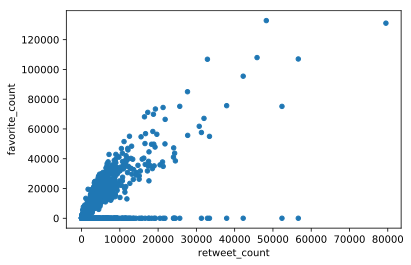

In [128]:
data.plot(x="retweet_count", y ="favorite_count", kind = 'scatter');

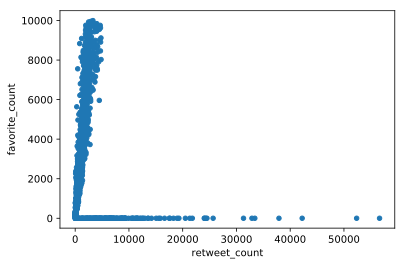

In [129]:
data = data.loc[data["favorite_count"]<10000]
data.plot(x="retweet_count", y ="favorite_count", kind = 'scatter');

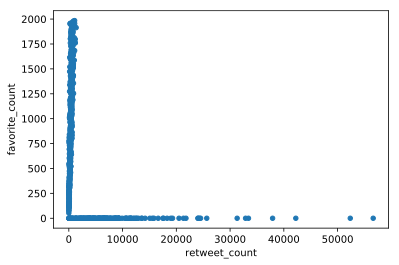

In [130]:
data = data.loc[data["favorite_count"]<2000]
data.plot(x="retweet_count", y ="favorite_count", kind = 'scatter');

# 2.5

There are some tweets in the  dataset that are actually retweets, because they have non-null values for retweeted_status_id column.
<br>
Also, in the same dataset, some rows have values for in_reply_to_user_id, which means those tweets are replies to other tweets.
<br>
those retweets are replies of users and not from WeRateDogs, thus need to be removed lest they may skew my analysis


# 3

In [131]:
df_combined_12_json['name'].value_counts().head(10)

None       853
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Name: name, dtype: int64

### Further step

text analysis